In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns

In [3]:
df1 = pd.read_csv('data/winequality-red.csv', sep=';')
df2 = pd.read_csv('data/winequality-white.csv', sep=';')
# Drop the null columns where all values are null
df1 = df1.dropna(axis='columns', how='all')
df2 = df2.dropna(axis='columns', how='all')
# Drop the null rows
df1 = df1.dropna()
df2 = df2.dropna()
# Merge two dataframes
df = df1.merge(df2, how='outer')

# pick white/red
# df = df2 # pick white
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6490,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6491,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6492,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6493,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [4]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 9)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [5]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [6]:
#Bad becomes 0 and good becomes 1 
df['quality'] = label_quality.fit_transform(df['quality'])

In [7]:
df['quality'].value_counts()

0    5219
1    1276
Name: quality, dtype: int64

C:\Users\gu202\anaconda3\envs\pythonMain\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


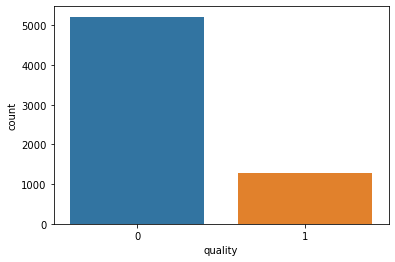

In [8]:
sns.countplot(df['quality'])

In [9]:
#  Create a Train Test Split
from sklearn.model_selection import train_test_split
y = df["quality"]
# X = df.drop(columns=["quality"])
X = df[["density", "alcohol"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [10]:
X_train.head()

,density,alcohol
4274,0.99094,11.2
201,0.99750,9.3
3968,0.99474,10.7
1390,0.99292,12.5
2827,0.99430,10.5


In [11]:
# Pre-processing
# Scale the data using the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [12]:
# Train the Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [13]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.8150277150482447
Testing Data Score: 0.8208128078817734


In [14]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'penalty': ["l1", "l2"]}
model = LogisticRegression(solver='liblinear')
grid = GridSearchCV(model, param_grid, verbose=3)

In [15]:
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] C=1, penalty=l1 .................................................
[CV] ..................... C=1, penalty=l1, score=0.815, total=   0.0s
[CV] C=1, penalty=l1 .................................................
[CV] ..................... C=1, penalty=l1, score=0.802, total=   0.0s
[CV] C=1, penalty=l1 .................................................
[CV] ..................... C=1, penalty=l1, score=0.818, total=   0.0s
[CV] C=1, penalty=l1 .................................................
[CV] ..................... C=1, penalty=l1, score=0.811, total=   0.0s
[CV] C=1, penalty=l1 .................................................
[CV] ..................... C=1, penalty=l1, score=0.820, total=   0.0s
[CV] C=1, penalty=l2 .................................................
[CV] ..................... C=1, penalty=l2, score=0.813, total=   0.0s
[CV] C=1, penalty=l2 .................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=5, penalty=l1 .................................................
[CV] ..................... C=5, penalty=l1, score=0.803, total=   0.0s
[CV] C=5, penalty=l1 .................................................
[CV] ..................... C=5, penalty=l1, score=0.817, total=   0.0s
[CV] C=5, penalty=l1 .................................................
[CV] ..................... C=5, penalty=l1, score=0.808, total=   0.0s
[CV] C=5, penalty=l1 .................................................
[CV] ..................... C=5, penalty=l1, score=0.817, total=   0.0s
[CV] C=5, penalty=l2 .................................................
[CV] ..................... C=5, penalty=l2, score=0.812, total=   0.0s
[CV] C=5, penalty=l2 .................................................
[CV] ..................... C=5, penalty=l2, score=0.803, total=   0.0s
[CV] C=5, penalty=l2 .................................................
[CV] ..................... C=5, penalty=l2, score=0.816, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.4s finished


GridSearchCV(estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [1, 5, 10], 'penalty': ['l1', 'l2']}, verbose=3)

In [16]:
GridSearchCV(estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [1, 5, 10], 'penalty': ['l1', 'l2']}, verbose=3)

GridSearchCV(estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [1, 5, 10], 'penalty': ['l1', 'l2']}, verbose=3)

In [17]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 1, 'penalty': 'l2'}
0.8146173853524983


In [18]:
# Save the Model
import joblib
filename = 'logistic.sav'
joblib.dump(grid, filename)

['logistic.sav']